<h1 id="ALG_004_EXP_002-Baseline-MacLean_et_al-param_search">Analysis on the parameter "match"'s effect on disparity accuracy</h1><h2>For analysis and discussion, please visit: <a href="ALG_004_EXP_002-VIS.ipynb">ALG_004_EXP_002-VIS</a></h2>


In [2]:
###################################################################
# Built-in modules ################################################
###################################################################

import sys
import os
sys.path.append(os.path.join("..", ".."))

import numpy as np
import imp
import cv2
import os
import matplotlib.pyplot as plt
import gc

import math
import time
import glob

###################################################################
# Custom modules ##################################################
###################################################################

from components.matchers.NumbaSimpleMatcher import Wrapper as m
from components.utils.SimpleProgressBar import SimpleProgressBar
from components.utils import utils as u
from components.utils import plot_utils as plu
from components.utils.CSVWriter2 import Wrapper as csv
from components.utils.Metrix import Wrapper as me

import project_helpers

###################################################################
# Dataset specific modules#########################################
###################################################################

from components.utils import middlebury_utils as mbu


In [3]:
ROOT_PATH = os.path.join("..", "..")
EXPERIMENT_TITLE = "ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_param_search"

INIT_METHOD = "maclean"
DATASET = "middlebury"

DATASET_FOLDER = os.path.join(ROOT_PATH, "datasets", DATASET)
LOG_FOLDER = os.path.join(ROOT_PATH, "experiments", "logs")
CSV_FILEPATH = os.path.join(LOG_FOLDER, EXPERIMENT_TITLE+".csv")
IMG_RES = "450X375"
PREPROCESSING_METHOD = "None"
KERNEL_SIZE = 1
KERNEL_SPEC = "None"

SCENES = ["teddy", "cones"]
SIZE=""
YEAR= 2003
EXP_PARAMS = dict()

#  Loading the dataset and visualising the results

['im2.png', 'im6.png', 'disp2.png', 'teddy_nonocc.png']
..\..\datasets\middlebury\middlebury_2003\teddy\im2.png
..\..\datasets\middlebury\middlebury_2003\teddy\im6.png
..\..\datasets\middlebury\middlebury_2003\teddy\disp2.png
..\..\datasets\middlebury\middlebury_2003\teddy\teddy_nonocc.png
['im2.png', 'im6.png', 'disp2.png', 'cones_nonocc.png']
..\..\datasets\middlebury\middlebury_2003\cones\im2.png
..\..\datasets\middlebury\middlebury_2003\cones\im6.png
..\..\datasets\middlebury\middlebury_2003\cones\disp2.png
..\..\datasets\middlebury\middlebury_2003\cones\cones_nonocc.png


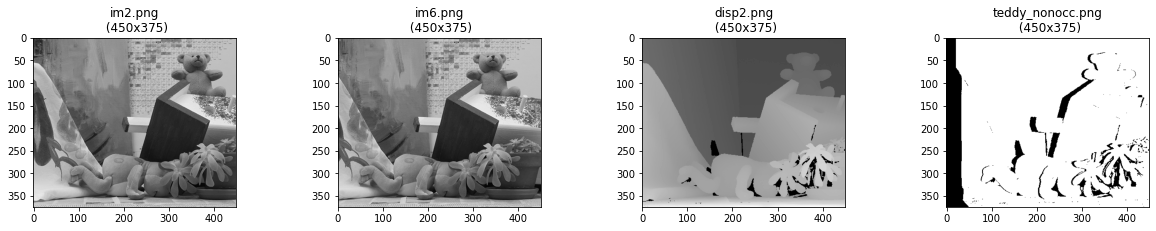

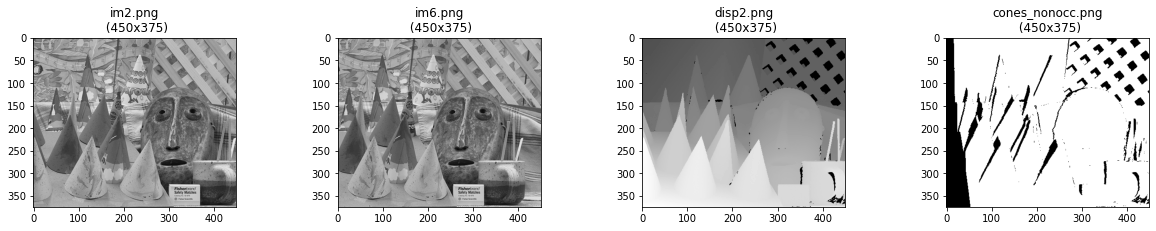

In [3]:
loaded_imgs_and_paths = list(mbu.get_images(DATASET_FOLDER, YEAR, scene) for scene in SCENES)

for im, path in loaded_imgs_and_paths:
    filenames = list(os.path.split(p)[-1] for p in path)
    plu.plot_images(im, filenames)

# Benchmarking and evaluation

In [4]:
###################################################################
# Initialising hyperparameters and matcher ########################
###################################################################

csv_logger = csv(CSV_FILEPATH, default_header=False)
csv_logger.set_header_function(csv_logger.get_header_v3)
csv_logger.write_csv_header()
csv_logger.set_line_function(csv.format_stereo_matching_results_v2)

progress_bar = SimpleProgressBar.get_instance()

MATCH = 60
GAP = -20
EGAP = -1


EXP_PARAMS = {"experiment_id":EXPERIMENT_TITLE, "match": MATCH,"gap":GAP,"egap":EGAP,\
                  "algo":str(m.__module__), "init_method":"default","dataset":DATASET,\
                  "preprocessing_method":"None","kernel_size":1,"kernel_spec":"None"}


SAVE_PATH  = os.path.join(ROOT_PATH, "experiments", "disparities", EXPERIMENT_TITLE)

saved_image_names = []
results = []

File ..\..\experiments\logs\ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_param_search.csv already exists, header has not been written.


In [5]:
###################################################################
# Matching ########################################################
###################################################################


EXP_PARAMS["init_method"] = "maclean_et_al"
progress_counter = 1
steps_to_be_taken = 2*60
for match_value in range(0,60):
    for i, scene in enumerate(SCENES):
        
        EXP_PARAMS["match"] = MATCH = match_value
        matcher = m(MATCH, GAP, EGAP)

        EXP_PARAMS["scene"] = scene
        EXP_PARAMS["image_filename"] = IMAGE_FILENAME = loaded_imgs_and_paths[i][1][0]
        EXP_PARAMS["img_res"] = "{0}x{1}".format(loaded_imgs_and_paths[i][0][1].shape[1], loaded_imgs_and_paths[i][0][1].shape[0])  
        occ = loaded_imgs_and_paths[i][0][3]
        gt = loaded_imgs_and_paths[i][0][2]

        matcher.set_images(loaded_imgs_and_paths[i][0][0].astype(np.float64), loaded_imgs_and_paths[i][0][1].astype(np.float64))

        tic = time.time()

        matcher.configure_instance(initialize_matrix_template= matcher.matrix_template_intit[1])

        tic=time.time()

        x,raw_disp_map = matcher.test_pipeline()
        toc = time.time()

        EXP_PARAMS["runtime"] = toc-tic

        disp = raw_disp_map
        disp = disp
        
        temp_path = u.save_disparity(SAVE_PATH, disp)
        saved_image_names.append(os.path.split(temp_path)[-1])
        
        EXP_PARAMS["image_filename"] = temp_path
       
        
        
        EXP_PARAMS["are_occlusions_errors"] = ARE_OCCLUSIONS_ERRORS = False

        EXP_PARAMS["bad1"], EXP_PARAMS["bad2"], EXP_PARAMS["bad4"], EXP_PARAMS["BAD8"], EXP_PARAMS["abs_error"], EXP_PARAMS["mse"], EXP_PARAMS["avg"], EXP_PARAMS["eucledian"] =\
        BAD1, BAD2, BAD4, BAD8, ABS_ERR, MSE, AVG, EUCLEDIAN = me.evaluate_over_all(disp, gt/4, occ, occlusions_counted_in_errors = ARE_OCCLUSIONS_ERRORS)

        csv_logger.append_new_sm_results(EXP_PARAMS, selected_keys=csv.get_header_v3())

        EXP_PARAMS["are_occlusions_errors"]  = True
        EXP_PARAMS["bad1"], EXP_PARAMS["bad2"], EXP_PARAMS["bad4"], EXP_PARAMS["BAD8"], EXP_PARAMS["abs_error"], EXP_PARAMS["mse"], EXP_PARAMS["avg"], EXP_PARAMS["eucledian"] =\
        BAD1, BAD2, BAD4, BAD8, ABS_ERR, MSE, AVG, EUCLEDIAN = me.evaluate_over_all(disp, gt/4, gt, occlusions_counted_in_errors = ARE_OCCLUSIONS_ERRORS)

        csv_logger.append_new_sm_results(EXP_PARAMS, selected_keys=csv.get_header_v3())
        results.append(disp)

        progress_bar.progress_bar(progress_counter, steps_to_be_taken, header= "Experiment on patch sizes in progress: ", progress_bar_steps=40)
        progress_counter+=1

Experiment on patch sizes in progress:  [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100.00 % completed: 120 / 120 steps

In [4]:
import pandas as pd
experiment_log = pd.read_csv(CSV_FILEPATH)
experiment_log.sort_values(by="bad4", inplace=True) 
experiment_log.head(30)

,experiment_id,match,gap,egap,algo,init_method,dataset,scene,image_filename,img_res,...,are_occlusions_errors,abs_error,mse,avg,eucledian,bad1,bad2,bad4,bad8,runtime
48,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,11,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,experiments\disparities\ALG_004_EXP_002-Baseli...,450x375,...,False,1671064,1148.878563,11.610578,12858.985030,0.648597,0.512548,0.310271,0.155149,17.133021
52,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,12,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,experiments\disparities\ALG_004_EXP_002-Baseli...,450x375,...,False,1598258,1073.837555,11.104720,12431.940480,0.645783,0.510853,0.312049,0.154892,16.053576
44,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,10,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,experiments\disparities\ALG_004_EXP_002-Baseli...,450x375,...,False,1754336,1232.099551,12.189153,13316.574630,0.652030,0.516620,0.312897,0.158081,16.403352
64,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,15,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,experiments\disparities\ALG_004_EXP_002-Baseli...,450x375,...,False,1504848,962.399011,10.455706,11769.207280,0.644414,0.510005,0.316482,0.158359,18.488687
60,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,14,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,experiments\disparities\ALG_004_EXP_002-Baseli...,450x375,...,False,1530044,993.939830,10.630769,11960.509350,0.645373,0.510950,0.317239,0.158776,16.737556
56,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,13,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,experiments\disparities\ALG_004_EXP_002-Baseli...,450x375,...,False,1578782,1047.457777,10.969401,12278.290110,0.646895,0.512819,0.317510,0.157817,18.496300
68,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,16,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,experiments\disparities\ALG_004_EXP_002-Baseli...,450x375,...,False,1495682,951.182135,10.392021,11700.420510,0.644984,0.510762,0.318038,0.158762,16.408332
40,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,9,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,experiments\disparities\ALG_004_EXP_002-Baseli...,450x375,...,False,1919632,1395.232105,13.337632,14170.750720,0.654941,0.520740,0.318275,0.166065,15.690641
72,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,17,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,experiments\disparities\ALG_004_EXP_002-Baseli...,450x375,...,False,1491862,936.598029,10.365479,11610.375020,0.645220,0.511617,0.320741,0.161910,16.756253
76,ALG_004_EXP_002-Baseline-MacLean_et_al-Numba_p...,18,-20,-1,components.matchers.NumbaSimpleMatcher,maclean_et_al,middlebury,cones,experiments\disparities\ALG_004_EXP_002-Baseli...,450x375,...,False,1468522,908.420494,10.203313,11434.392330,0.645846,0.512215,0.322374,0.162076,15.862504


<ipython-input-5-4e26aad9974f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-4e26aad9974f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-4e26aad9974f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



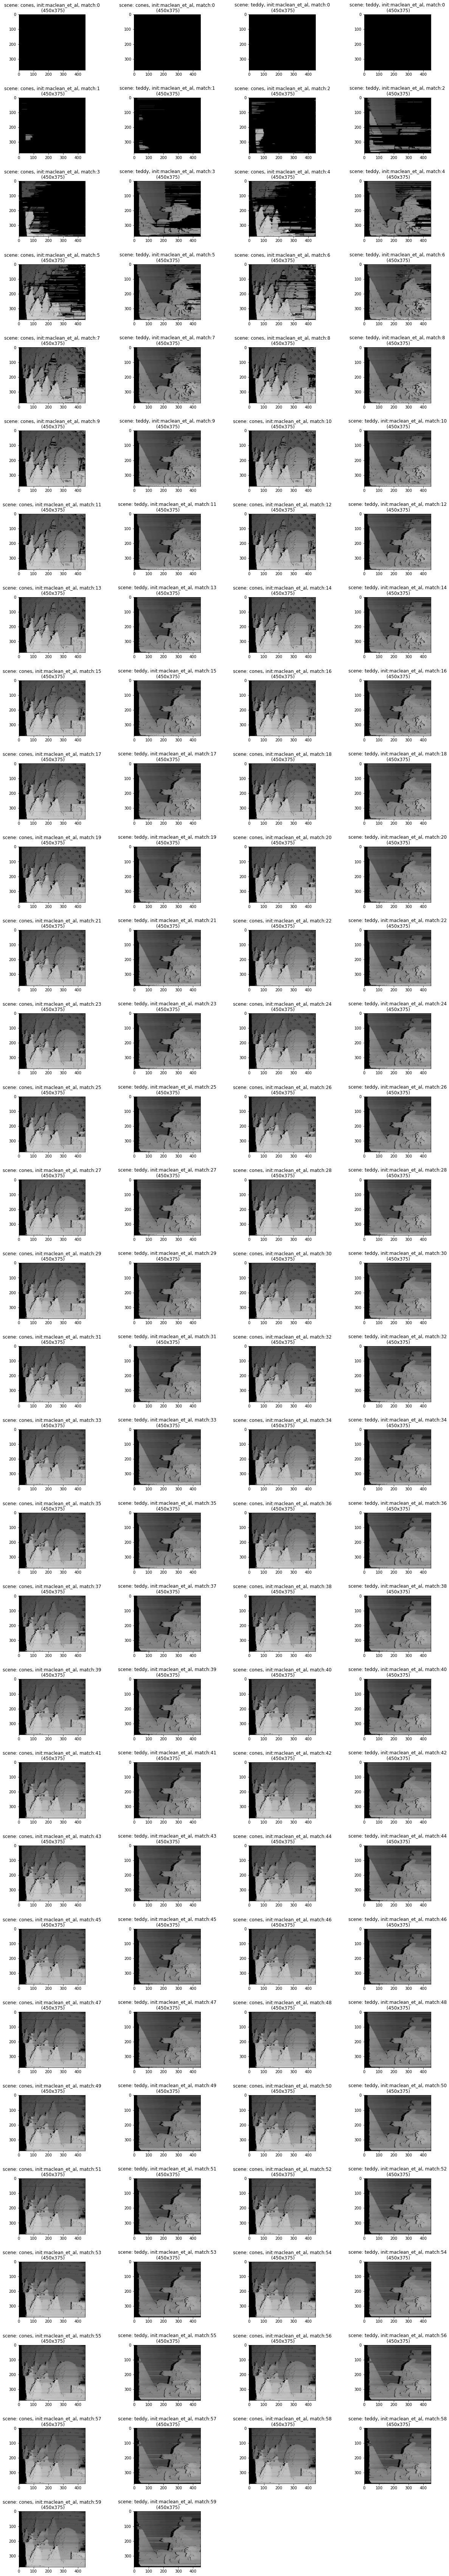

In [5]:
image_reader_func = lambda filepath: cv2.imread(str(project_helpers.fix_win_rel_paths(filepath)))

filtered_log= experiment_log[experiment_log["are_occlusions_errors"] == False]
filtered_log["loaded_imgs"] = [image_reader_func(filepath) for filepath in filtered_log["image_filename"]]
filtered_log["annotation"] = [("scene: {0}, init:{1}, match:{2}".format(scene, init, m)) for scene, init, m in filtered_log[["scene", "init_method", "match"]].values]
filtered_log.sort_values(by=["match", "scene"], inplace=True)
plu.plot_images(filtered_log["loaded_imgs"].values, filtered_log["annotation"].values)

For analysis please visit <a href="ALG_004_EXP_002-VIS.ipynb">ALG_004_EXP_002-VIS</a>.